<a href="https://colab.research.google.com/github/NickOLeeney/data-science-projects/blob/main/HotelReservationProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel Reservation Project

## Introduction 
Data were taken from this [Kaggle Dataset](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset?select=Hotel+Reservations.csv)

The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

In this project there will be examinated some of the most import classification ML algorithm in order to predict if a customer is going to honor the reservation or cancel it

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as npm

In [2]:
df = pd.read_csv('Hotel Reservations.csv')

## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [43]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,honored_reservation
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655,0.672364
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236,0.469358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000,1.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [38]:
df['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [39]:
df['honored_reservation'] = df['booking_status'].apply(lambda x:1 if x== 'Not_Canceled' else 0)

<AxesSubplot:>

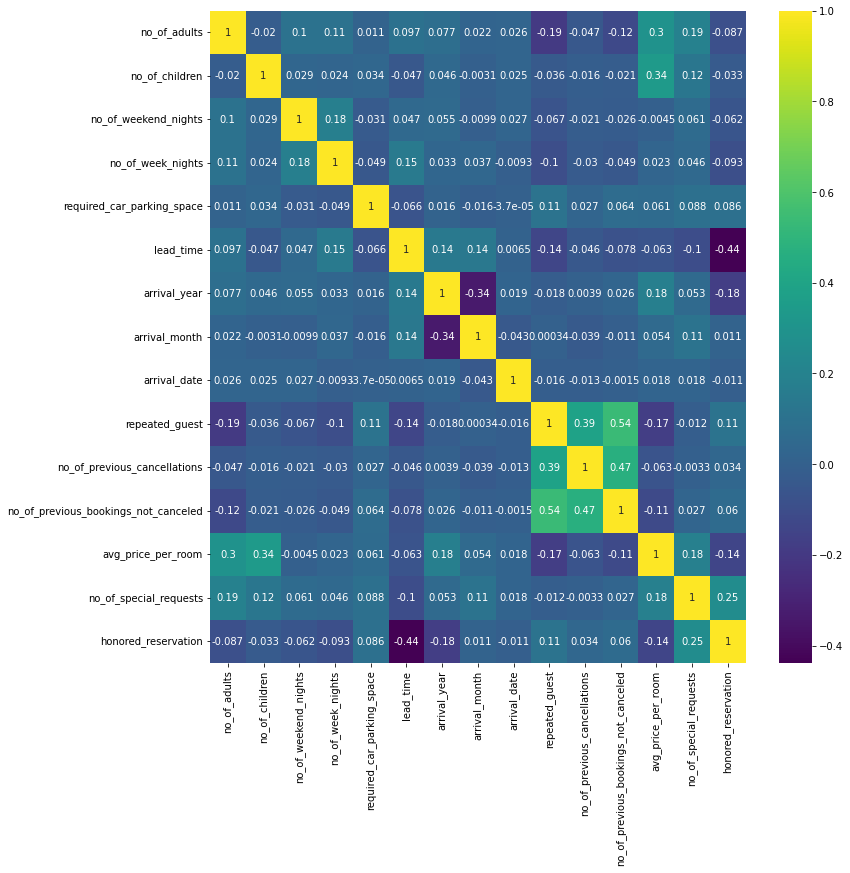

In [40]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap='viridis', annot=True)

In [6]:
df['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

<AxesSubplot:xlabel='booking_status', ylabel='count'>

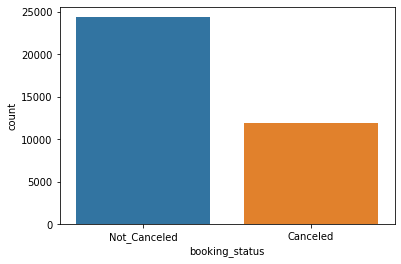

In [8]:
sns.countplot(data=df, x='booking_status')

<AxesSubplot:xlabel='no_of_adults', ylabel='count'>

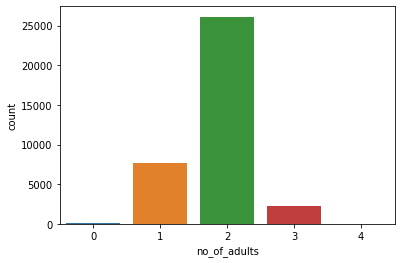

In [14]:
sns.countplot(data=df, x='no_of_adults')

In [16]:
df[df['no_of_adults'] == 0]['no_of_children'].value_counts() ## room with only children

2    133
3      5
1      1
Name: no_of_children, dtype: int64

<AxesSubplot:xlabel='no_of_children', ylabel='count'>

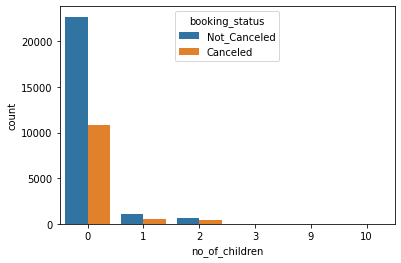

In [19]:
sns.countplot(data=df, x='no_of_children', hue = 'booking_status')

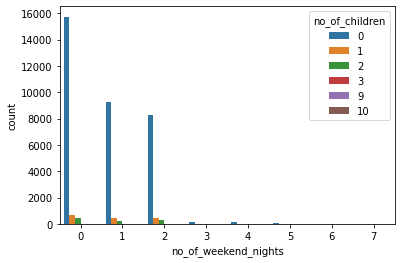

In [23]:
img = sns.countplot(data=df, x='no_of_weekend_nights', hue='no_of_children')  
sns.move_legend(img, "upper right", bbox_to_anchor=(1, 1))

In [25]:
df['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

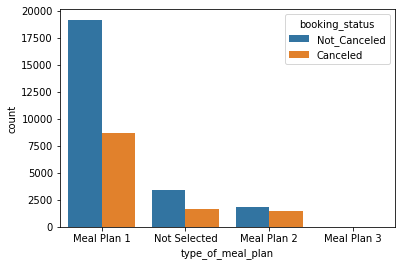

In [28]:
img = sns.countplot(data=df, x='type_of_meal_plan', hue='booking_status')
sns.move_legend(img, "upper right", bbox_to_anchor=(1, 1))

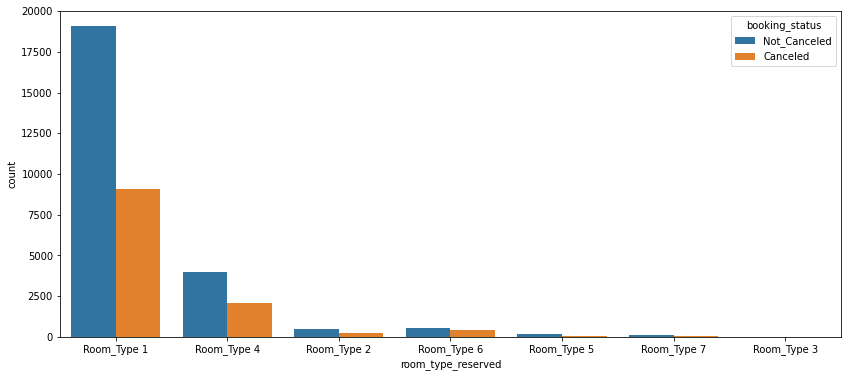

In [31]:
plt.figure(figsize=(14,6))
img = sns.countplot(data=df, x='room_type_reserved', hue='booking_status')
sns.move_legend(img, "upper right", bbox_to_anchor=(1, 1))

<AxesSubplot:xlabel='no_of_children', ylabel='avg_price_per_room'>

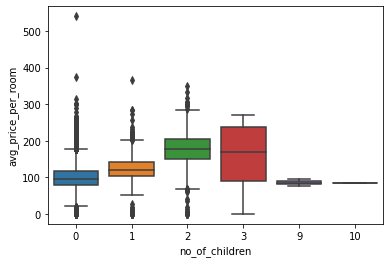

In [42]:
sns.boxplot(data=df, x='no_of_children', y='avg_pricme_per_room')

In [49]:
df[df['no_of_children']==10]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,honored_reservation
6338,INN06339,2,10,0,2,Meal Plan 1,0,Room_Type 4,37,2018,1,12,Online,0,0,0,84.45,1,Not_Canceled,1


<AxesSubplot:xlabel='avg_price_per_room', ylabel='Count'>

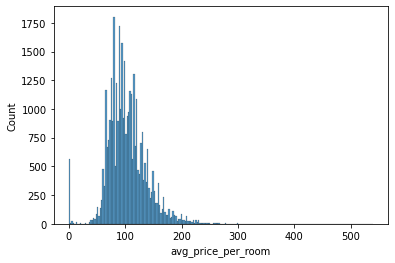

In [51]:
sns.histplot(data=df, x='avg_price_per_room')

## Data preprocessing

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [53]:
# dropping 'Booking_ID' column
df.drop('Booking_ID',axis=1,inplace=True)

In [59]:
# dropping 'booking_status' label
df.drop('booking_status',axis=1,inplace=True)

### Getting dummy variables

In [63]:
print(df['type_of_meal_plan'].value_counts())
print('\n')
print(df['room_type_reserved'].value_counts())
print('\n')
print(df['market_segment_type'].value_counts())

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64


Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64


Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64


In [66]:
# creating dummy variables
type_of_meal_plan_dummies = pd.get_dummies(df['type_of_meal_plan'],drop_first=True)
room_type_reserved_dummies = pd.get_dummies(df['room_type_reserved'],drop_first=True)
market_segment_type_dummies = pd.get_dummies(df['market_segment_type'],drop_first=True)

In [67]:
# dropping categorical variables
df.drop('type_of_meal_plan',axis=1,inplace=True)
df.drop('room_type_reserved',axis=1,inplace=True)
df.drop('market_segment_type',axis=1,inplace=True)

In [69]:
df = pd.concat([df,type_of_meal_plan_dummies,room_type_reserved_dummies,market_segment_type_dummies],axis=1)

In [71]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7,Complementary,Corporate,Offline,Online
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,0,1


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

### Train Test Split

In [75]:
X = df.drop('honored_reservation',axis=1)
y = df['honored_reservation']

In [76]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
len(df)

36275

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Normalizing the data

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
scaler = MinMaxScaler()

In [80]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Classification Models

In [91]:
from sklearn.metrics import classification_report, confusion_matrix

### Random Forest Algorithm

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
randomForestClassifier = RandomForestClassifier()

In [90]:
randomForestClassifier.fit(X_train,y_train)
y_pred = randomForestClassifier.predict(X_test)

In [96]:
print('Random Forest Evaluation')
print('\n')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Random Forest Evaluation


              precision    recall  f1-score   support

           0       0.87      0.82      0.84      3517
           1       0.91      0.94      0.93      7366

    accuracy                           0.90     10883
   macro avg       0.89      0.88      0.89     10883
weighted avg       0.90      0.90      0.90     10883

[[2872  645]
 [ 423 6943]]
